In [1]:
import os
import pandas as pd
import warnings 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)

In [2]:
path = './data/'

train = pd.read_csv(path+'4_train.csv')
test = pd.read_csv(path+'4_test.csv')

train.shape, test.shape

((2952, 73), (1008, 72))

## 전용면적 범주화

<AxesSubplot:>

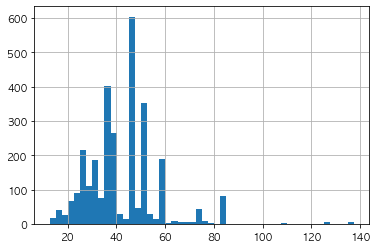

In [3]:
train.loc[train['전용면적']<150,'전용면적'].hist(bins=50) # 전용면적 상한 100, 하한 15

In [4]:
# train과 test 셋 합치기
print(train.shape, test.shape)
all_df = pd.concat([train.drop("등록차량수",axis=1), test])
all_df.reset_index(inplace=True, drop=True)
print(all_df.shape)

(2952, 73) (1008, 72)
(3960, 72)


35     937
45     849
50     524
25     453
30     304
55     269
20     216
15     131
80      95
70      56
40      56
100     37
75      14
60      10
65       9
Name: 전용면적_5, dtype: int64


<AxesSubplot:xlabel='전용면적_5', ylabel='count'>

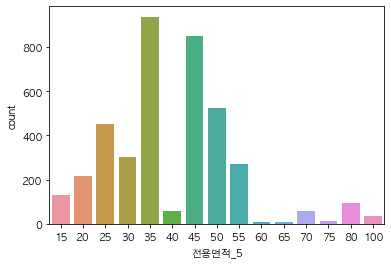

In [5]:
# 전용면적 상/하한 적용
all_df['전용면적_5'] = all_df['전용면적'].astype(int)
all_df['전용면적_5'] = all_df['전용면적_5']//5*5
idx = all_df[all_df['전용면적']>100].index
all_df.loc[idx, '전용면적_5'] = 100

idx = all_df[all_df['전용면적']<15].index
all_df.loc[idx, '전용면적_5'] = 15

print(all_df['전용면적_5'].value_counts())
sns.countplot(all_df['전용면적_5'],order=np.sort(all_df['전용면적_5'].unique()))

In [6]:
from sklearn.preprocessing import OneHotEncoder

# 원핫인코더
oh_encoder = OneHotEncoder()
ohs = oh_encoder.fit_transform(all_df['전용면적_5'].to_numpy().reshape(-1,1)).toarray()
print(ohs.shape)

# 원핫인코딩 DF 만들기 및 컬럼명 지정
ohs_df = pd.DataFrame(ohs)
ohs_df.columns = ["전용면적_"+str(i) for i in np.sort(all_df['전용면적_5'].unique())]
ohs_df = ohs_df.astype(int)
print(ohs_df.sum())
ohs_df.head()

# 35.0     937
# 45.0     849
# 50.0     524
# 25.0     453
# 30.0     304
# 55.0     269
# 20.0     216
# 15.0     131
# 80.0      95
# 70.0      56
# 40.0      56
# 100.0     37
# 75.0      14
# 60.0      10
# 65.0       9

(3960, 15)
전용면적_15     131
전용면적_20     216
전용면적_25     453
전용면적_30     304
전용면적_35     937
전용면적_40      56
전용면적_45     849
전용면적_50     524
전용면적_55     269
전용면적_60      10
전용면적_65       9
전용면적_70      56
전용면적_75      14
전용면적_80      95
전용면적_100     37
dtype: int64


,전용면적_15,전용면적_20,전용면적_25,전용면적_30,전용면적_35,전용면적_40,전용면적_45,전용면적_50,전용면적_55,전용면적_60,전용면적_65,전용면적_70,전용면적_75,전용면적_80,전용면적_100
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [7]:
ohs_df
# all_df

,전용면적_15,전용면적_20,전용면적_25,전용면적_30,전용면적_35,전용면적_40,전용면적_45,전용면적_50,전용면적_55,전용면적_60,전용면적_65,전용면적_70,전용면적_75,전용면적_80,전용면적_100
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3956,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3957,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3958,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [8]:
all_df = pd.concat([all_df, ohs_df], axis=1)
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,전용면적_40,전용면적_45,전용면적_50,전용면적_55,전용면적_60,전용면적_65,전용면적_70,전용면적_75,전용면적_80,전용면적_100
0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,...,0,0,0,0,0,0,0,0,0,0
1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,...,0,0,0,0,0,0,0,0,0,0
2,ERR04_2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,...,0,0,1,0,0,0,0,0,0,0
3,ERR04_2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,...,0,0,1,0,0,0,0,0,0,0
4,ERR04_2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,NaN,...,0,0,0,0,0,0,0,0,0,0
3956,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000.0,...,0,0,0,0,0,0,0,0,0,0
3957,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000.0,...,0,0,0,0,0,0,0,0,0,0
3958,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000.0,...,0,0,0,0,0,0,0,0,0,0


## 지역 범주화
- 일단은 하는데... 평균/중앙값으로 나누는게 다른 데이터셋이면 의미가 없어지는 것 같다.. 

In [9]:
city_grp1 = ['충청남도','강원도', '제주특별자치도']
city_grp2 = ['경상남도','울산광역시','서울특별시', '부산광역시', '대전광역시', '전라북도', '경상북도', '전라남도', '경기도', '충청북도']
city_grp3 = ['광주광역시','세종특별자치시','대구광역시']

def city_cat(row):
    if row in city_grp1 :
        return 'low'
    elif row in city_grp2 :
        return 'mid'
    elif row in city_grp3 :
        return 'high'
    else:
        return np.nan

all_df['지역_cat'] = all_df['지역'].apply(city_cat)
print(all_df['지역_cat'].dtype)
all_df.head()

object


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,전용면적_45,전용면적_50,전용면적_55,전용면적_60,전용면적_65,전용면적_70,전용면적_75,전용면적_80,전용면적_100,지역_cat
0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,...,0,0,0,0,0,0,0,0,0,mid
1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,...,0,0,0,0,0,0,0,0,0,mid
2,ERR04_2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,...,0,1,0,0,0,0,0,0,0,mid
3,ERR04_2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,...,0,1,0,0,0,0,0,0,0,mid
4,ERR04_2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,...,0,1,0,0,0,0,0,0,0,mid


## train셋과 test 셋 분리

In [10]:
print(train.shape, test.shape)
train_new = all_df.iloc[:2952,:]
train_new['등록차량수'] = train['등록차량수']
test_new = all_df.iloc[2952:, :]

print(train_new.shape, test_new.shape)

(2952, 73) (1008, 72)
(2952, 90) (1008, 89)


## 전용면적 비례 차량수 피처 생성

In [11]:
def df_new(df):
    
    # 전용면적의 소수점 없애기
    df['전용면적'] = df['전용면적'].apply(int)
    
    # 겹치는 전용면족 행 병합(결측치 없는 피처로 구분)
    cols = list(df.columns)
    cols.remove('전용면적별세대수')
    cols.remove('지하철')
    cols.remove('임대료')
    cols.remove('임대보증금')
    df_new = df.groupby(cols, as_index=False).agg({'전용면적별세대수': 'sum'})
    
    # 각 전용면적과 그에 상응하는 세대수의 곱
    df_new['면적_세대수_곱']  = df_new['전용면적'] * df_new['전용면적별세대수']
    
    # 각 단지코드당 계산된 실제 총 세대수
    df_new['면적_세대수_곱_총합'] = df_new['면적_세대수_곱'].groupby(df_new['단지코드']).transform('sum')
    
    # 비율 계산
    df_new['면적_세대수_비율'] = df_new['면적_세대수_곱']/df_new['면적_세대수_곱_총합']
    
    # 전용면적_비례_차량수
    try :
        df_new['전용면적_비례_차량수'] = df_new.apply(lambda row: (row['면적_세대수_비율'] * row['등록차량수']), axis=1)
    except :
        return df_new
    
    return df_new

print(train_new.shape, test_new.shape)

train_new = df_new(train_new)
test_new = df_new(test_new)

print(train_new.shape, test_new.shape)

(2952, 90) (1008, 89)
(1437, 91) (518, 89)


## 최종 피처

In [12]:
list(train_new.columns)

['단지코드',
 '총세대수',
 '임대건물구분',
 '지역',
 '공급유형',
 '전용면적',
 '공가수',
 '자격유형',
 '버스정류장',
 '단지내주차면수',
 'ERROR1',
 '임대건물구분_lb',
 '상가',
 '아파트',
 '지역_lb',
 '강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도',
 '공급유형_lb',
 '공공분양',
 '공공임대(10년)',
 '공공임대(50년)',
 '공공임대(5년)',
 '공공임대(분납)',
 '국민임대',
 '영구임대',
 '임대상가',
 '장기전세',
 '행복주택',
 '자격유형_lb',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'ERROR1_lb',
 '나머지',
 '분양상가',
 '분양아파트',
 '총세대수_lb',
 '총세대수_lb_A1',
 '총세대수_lb_B1',
 '총세대수_lb_C1',
 '총세대수_lb_D1',
 '총세대수_lb_E1',
 '전용면적_5',
 '전용면적_15',
 '전용면적_20',
 '전용면적_25',
 '전용면적_30',
 '전용면적_35',
 '전용면적_40',
 '전용면적_45',
 '전용면적_50',
 '전용면적_55',
 '전용면적_60',
 '전용면적_65',
 '전용면적_70',
 '전용면적_75',
 '전용면적_80',
 '전용면적_100',
 '지역_cat',
 '등록차량수',
 '전용면적별세대수',
 '면적_세대수_곱',
 '면적_세대수_곱_총합',
 '면적_세대수_비율',
 '전용면적_비례_차량수']

## csv, xlsx 파일로 내보내기

In [13]:
train_new.to_csv(path+"5_train.csv", index=False)
test_new.to_csv(path+"5_test.csv", index=False)

train_new.to_excel(path+"5_train.xlsx", index=False)
test_new.to_excel(path+"5_test.xlsx", index=False)

os.listdir(path)

['2_test.xlsx',
 '3_train.csv',
 'age_gender_info.csv',
 '.DS_Store',
 '2_train.xlsx',
 '2_train_errx.xlsx',
 '5_train.csv',
 '3_test.xlsx',
 'test.csv',
 '2_train.csv',
 '5_train.xlsx',
 '5_test.xlsx',
 '1_test.csv',
 '4_train.csv',
 '3_train.xlsx',
 '1_train.csv',
 '1_train_errx.xlsx',
 '5_test.csv',
 '4_test.csv',
 '2_train_errx.csv',
 'train.csv',
 '1_test.xlsx',
 '1_train.xlsx',
 '2_test.csv',
 '3_test.csv',
 '1_train_errx.csv',
 'sample_submission.csv']